# Notebook for Visualizing Test/Train Results

In [10]:
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
file_path = 'results_no_tda.txt'

In [13]:
def load_data(path):
    optimized_data = []
    dummy_data = []
    with open(path) as f:
        lines = f.readlines()
        for line in lines:
            if not line or len(line.split()) == 0:
                continue
            else:
                line_arr = line.split()
                if line_arr[0] == 'RMSE':
                    optimized_data.append(float(line_arr[2]))
                elif line_arr[0] == 'Random':
                    dummy_data.append(float(line_arr[4]))
    return np.array(optimized_data), np.array(dummy_data)

In [14]:
optimized_data, dummy_data = load_data(file_path)

In [15]:
def get_cdf_values(data, label='default label'):
    x = np.sort(data)
    s = np.sum(x)
    p = x / s
    y = np.cumsum(p)
    return x, y, label

In [16]:
def plot_cdf(data, title='Add a title', xlabel='Add an xlabel', ylabel='Add a ylabel', path=None):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for dataset in data:
        x, y, label = dataset
        plt.plot(x, y, label=label)
    plt.legend()
    if path is not None:
        plt.savefig(path)
    plt.show()

In [17]:
xlabel = 'RMSE Test Score'
ylabel = 'Probability'
title = 'Graph Classification'

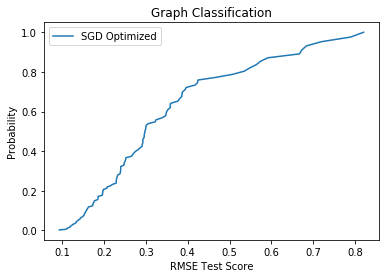

In [18]:
dataset1 = get_cdf_values(optimized_data, label='SGD Optimized')
plot_cdf([dataset1], title=title, xlabel=xlabel, ylabel=ylabel, path='baseline_sgd.PDF')

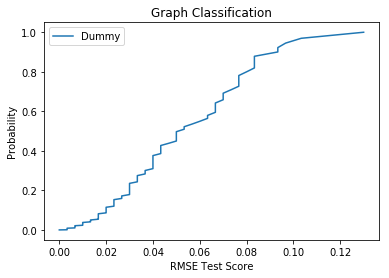

In [19]:
dataset2 = get_cdf_values(dummy_data, label='Dummy')
plot_cdf([dataset2], title=title, xlabel=xlabel, ylabel=ylabel, path='baseline_dummy.PDF')

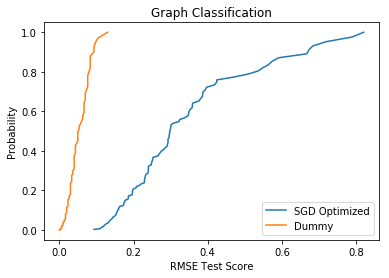

In [20]:
plot_cdf([dataset1, dataset2], title=title, xlabel=xlabel, ylabel=ylabel, path='baseline_combined.PDF')

In [21]:
file_path = 'results_tda.txt'

In [22]:
optimized_tda_data, dummy_tda_data = load_data(file_path)

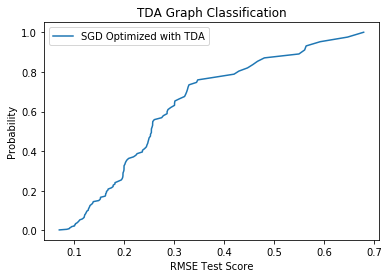

In [23]:
title = 'TDA Graph Classification'
dataset3 = get_cdf_values(optimized_tda_data, label='SGD Optimized with TDA')
plot_cdf([dataset3], title=title, xlabel=xlabel, ylabel=ylabel, path='TDA_sgd.PDF')

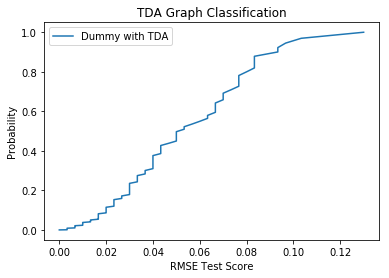

In [24]:
dataset4 = get_cdf_values(dummy_tda_data, label='Dummy with TDA')
plot_cdf([dataset4], title=title, xlabel=xlabel, ylabel=ylabel, path='TDA_dummy.PDF')

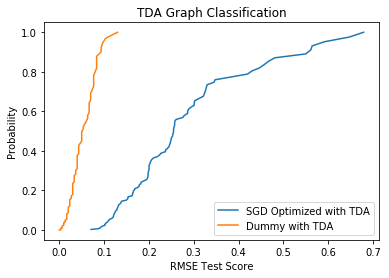

In [25]:
plot_cdf([dataset3, dataset4], title=title, xlabel=xlabel, ylabel=ylabel, path='TDA_combined.PDF')

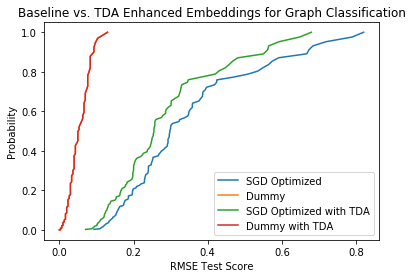

In [26]:
title = 'Baseline vs. TDA Enhanced Embeddings for Graph Classification'
plot_cdf([dataset1, dataset2, dataset3, dataset4], title=title, xlabel=xlabel, ylabel=ylabel, path='all_combined.PDF')